### COVID 19 data plotter - experimental phase


### Example based on code at 
[scitools.org.uk](https://scitools.org.uk/cartopy/docs/latest/gallery/hurricane_katrina.html#sphx-glr-gallery-hurricane-katrina-py)

### Used support from Stackoverflow to make the state-by-state colorization

[Link to the Stackoverflow](https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states)

### I never used type set before, here it was useful to get from the data table
### unique state names, rather than a long list with repeating names

[see link for sets in Python](https://pythonspot.com/python-set/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv file right from the GitHub page
### (It works with the package pandas!)

In [2]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"


df=pd.read_csv(url)
df.set_index("UID")
df.shape

(3340, 257)

In [3]:
def get_column_index(df,name):
    """ returns the column index for the given name (string)
    
    This function works case insensitive.
    """
    index=-9
    for j,c in enumerate(df.columns):
        if c.lower()==name.lower():
            index=j
        
    return index

def get_all_state_names(df):
    """ returns all states names from the table"""
    return set([name for name in df['Province_State']])


In [7]:


day=pd.datetime(2020,9,22)

coldate="{0}/{1}/{2}".format(day.month,day.day,day.year-2000)
#coldate=pd.datetime.strftime(day,'%m/%d/%y') # contains leading zeros, though

#icol=get_column_index(test,coldate)
#icol
state_set=get_all_state_names(df)

print(state_set)

{'New Jersey', 'Florida', 'Rhode Island', 'New Mexico', 'Indiana', 'Kansas', 'South Dakota', 'Maryland', 'South Carolina', 'Wisconsin', 'Vermont', 'North Dakota', 'Maine', 'Missouri', 'Ohio', 'Northern Mariana Islands', 'New York', 'Grand Princess', 'Diamond Princess', 'Texas', 'Minnesota', 'Pennsylvania', 'Louisiana', 'Michigan', 'Oklahoma', 'Delaware', 'West Virginia', 'Illinois', 'Colorado', 'Puerto Rico', 'Hawaii', 'District of Columbia', 'New Hampshire', 'Alaska', 'Washington', 'California', 'Arizona', 'Montana', 'Kentucky', 'Mississippi', 'Connecticut', 'Oregon', 'Georgia', 'Massachusetts', 'Wyoming', 'American Samoa', 'Iowa', 'Virgin Islands', 'Virginia', 'Nebraska', 'Nevada', 'North Carolina', 'Tennessee', 'Alabama', 'Utah', 'Idaho', 'Guam', 'Arkansas'}


In [8]:
# We create a dictionary with each state name and the current total count number
# 
state_total={}

i=0
for name in state_set:
    sdf=df.groupby("Province_State").get_group(name)
    sdf.set_index('Admin2')
    count=sdf[coldate].values
    state_total[name]=count.sum() 
    # we appended a new key and assign the value (state name as string is the key, the value is the counted number)
    print(i,name,state_total[name])
    i+=1


0 New Jersey 200580
1 Florida 687909
2 Rhode Island 24044
3 New Mexico 27790
4 Indiana 112626
5 Kansas 54000
6 South Dakota 19189
7 Maryland 120912
8 South Carolina 140789
9 Wisconsin 104170
10 Vermont 1721
11 North Dakota 18508
12 Maine 5146
13 Missouri 116612
14 Ohio 145850
15 Northern Mariana Islands 69
16 New York 451227
17 Grand Princess 103
18 Diamond Princess 49
19 Texas 741663
20 Minnesota 91422
21 Pennsylvania 156477
22 Louisiana 162214
23 Michigan 130357
24 Oklahoma 79072
25 Delaware 19761
26 West Virginia 14394
27 Illinois 279453
28 Colorado 66033
29 Puerto Rico 42596
30 Hawaii 11522
31 District of Columbia 15021
32 New Hampshire 7990
33 Alaska 6936
34 Washington 83193
35 California 793065
36 Arizona 214846
37 Montana 10700
38 Kentucky 62731
39 Mississippi 94021
40 Connecticut 56160
41 Oregon 31313
42 Georgia 308294
43 Massachusetts 127969
44 Wyoming 5016
45 American Samoa 0
46 Iowa 81618
47 Virgin Islands 1278
48 Virginia 141884
49 Nebraska 41785
50 Nevada 76298
51 North Ca

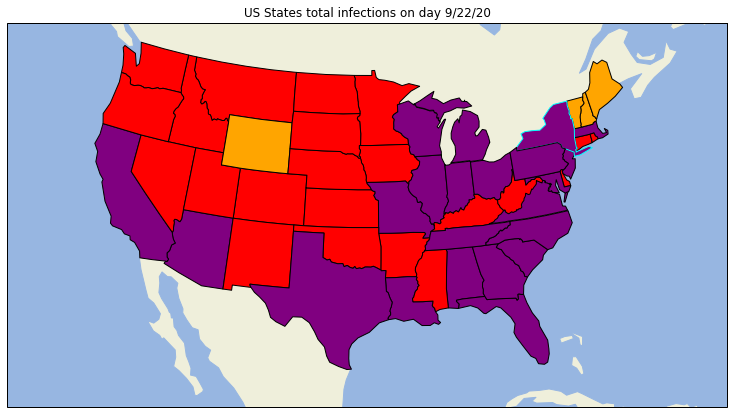

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)



# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(True)
ax.outline_patch.set_visible(True)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.set_title('US States total infections on day '+coldate)



for astate in shpreader.Reader(states_shp).records():
    
    name=astate.attributes['name']
    value=state_total[name]
    #print (name)
    #print(i,name,state_total[name])
    if value<1E7:
        facecolor = 'pink'
    if value<1E6:
        facecolor = 'purple'
    if value<1E5:
        facecolor = 'red'
    if value<1E4:
        facecolor = 'orange'
    if value<1E3:
        facecolor = 'yellow'
    if value<1E2:
        facecolor = 'lightblue'
    if value<1E1:
        facecolor = 'darkgray'
    if value==0:
        facecolor = 'lightgreen'
    # we use the shapefiles attribute name and hope it matches the state names that we have in teh  spreadsheet table
    
    if astate.attributes['name'] == "New York":
        #print(astate.attributes)
        ax.add_geometries(
            [astate.geometry],
            ccrs.PlateCarree(),
            facecolor=facecolor, edgecolor='cyan')
    else:
        ax.add_geometries(
        [astate.geometry],
            ccrs.PlateCarree(),
            facecolor=facecolor, edgecolor='black')
        pass
    # make two proxy artists to add to a legend
    ###direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    ###within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    ###labels = ['State directly intersects\nwith track',
    ###          'State is within \n2 degrees of track']
    ###ax.legend([direct_hit, within_2_deg], labels,
    ###          loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
plt.show()

#Todo: add a slider for the date and make plot interactive
# or animation html5 file